In [2]:
# Import ds packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Text preproc packages
import nltk
import re

# ML Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from sklearn.feature_extraction.text import TfidfVectorizer

# Misc packages
import os

# Change directory to match current path

In [3]:
os.chdir('..')

# Utility function

In [42]:
def text_preproc(data):
    data = re.sub(r"http\S+", "", data)
    data = re.sub(r'pic.twitter.com/[\w]*',"", data)

    data = re.sub(r"(#[\d\w\.]+)", 'happiness', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    data = re.sub('\W+',' ', data)

    return data.strip().lower()

# Load and preproc data

In [5]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [6]:
train_df['label'].value_counts()

1    1045
0     460
Name: label, dtype: int64

In [7]:
pos_df = train_df[train_df['label'] == 1].sample(460, random_state=2021)
neg_df = train_df[train_df['label'] == 0]

sampled_train_df = pd.concat([pos_df, neg_df])

In [53]:
train_text = sampled_train_df['message'].values
train_label = sampled_train_df['label'].values

test_text = test_df['message'].values
test_label = test_df['label'].values

In [54]:
preproc_train_text = []
preproc_test_text = []

for index, text in enumerate(train_text):
    norm_text = text_preproc(text)
    preproc_train_text.append(norm_text)
    
for index, text in enumerate(test_text):
    norm_text = text_preproc(text)
    preproc_test_text.append(norm_text)

# Train Model

In [82]:
vectorizer = TfidfVectorizer(sublinear_tf=True, norm='l2', ngram_range=(1, 2), stop_words='english')
vectorizer.fit(preproc_train_text)
vectorizer_train_text = vectorizer.transform(preproc_train_text)
vectorizer_test_text = vectorizer.transform(preproc_test_text)

model = RandomForestClassifier()
model.fit(vectorizer_train_text, train_label)

RandomForestClassifier()

# Evaluate model

In [83]:
y_pred = model.predict(vectorizer_test_text)

In [84]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.96      0.98        89

    accuracy                           0.98       183
   macro avg       0.98      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183



<AxesSubplot:>

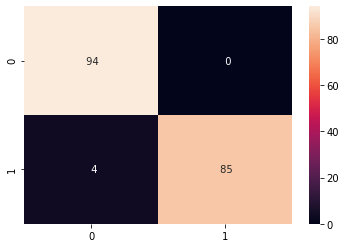

In [87]:
sns.heatmap(confusion_matrix(test_label, y_pred), annot=True, fmt='3')

In [88]:
matthews_corrcoef(test_label, y_pred)

0.9571177016890314

# Save model

In [91]:
import joblib
if not os.path.exists('model'):
    os.makedirs('model')
joblib.dump(model, 'model/model.pkl')

['model/model.pkl']

In [92]:
from sklearn.pipeline import Pipeline

In [97]:
pipeline = Pipeline([('vect', vectorizer), ('model', model)])

In [101]:
print(classification_report(test_label, pipeline.predict(test_text)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.96      0.98        89

    accuracy                           0.98       183
   macro avg       0.98      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183

